<a href="https://colab.research.google.com/github/fabiobaroliveira/analises/blob/main/gerando_tabela_dados_ficticios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Necessário instalar biblioteca Faker
!pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.7 MB/s eta 0:00:00


In [6]:
import pandas as pd
import random
from faker import Faker
fake = Faker('pt_BR')

# Listas de valores possíveis

marcas_modelos = {
    "Fiat" : [ "Mobi","Argo", "Cronos", "500e", "Pulse", "Fastback", "Strada", "Toro", "Fiorino"],
    "Volskwagen" : [ "Up", "Gol", "Voyage", "Saveiro", "Polo", "Virtus", "Nivus", "T-Cross", "Amarok"],
    "Chevrolet" : [ "Onix", "Prisma", "Cruze", "Tracker", "S-10", "TrailBlazer"],
    "Hyundai" : [ "HB20", "HB20S", "Creta", "Tucson"],
    "Honda" : [ "Civic", "HR-V", "City", "Fit", "CR-V"],
    "Toyota" : [ "Etios","Yaris","Corolla", "Camry", "Corolla Cross", "Hilux"],
    "Ford" : [ "Ka", "Ka Sedan", "Ecosport", "Ranger", "Focus", "Territory"],
    "Peugeot" : [ "208" , "308", "2008", "3008", "Partner"],
    "Citroen" : [ "C3", "Aircross", "C4", "C4 Grand Picasso", "Basalt"],
    "Jeep" : [ "Compass", "Renegade", "Wrangler", "Cherokee"]
}

formas_pagamento = ["À vista", "Financiamento", "Consórcio", "Leasing"]

cores = ["Preto", "Branco", "Prata", "Vermelho", "Azul", "Verde", "Cinza"]

sexo_opcoes = ["Masculino", "Feminino"]

# Gerando os dados fictícios

dados = []

for i in range(1, 1001):
  sexo = random.choice(sexo_opcoes)
  nome = fake.first_name_male() if sexo == "Masculino" else fake.first_name_female()
  sobrenome = fake.last_name()
  nome_completo = f"{nome} {sobrenome}"
  idade = random.randint(18, 70)
  cpf = fake.cpf()
  email = fake.email()
  telefone = fake.phone_number()
  cidade = fake.city()
  estado = fake.state_abbr()
  marca = random.choice(list(marcas_modelos.keys()))
  modelo = random.choice(marcas_modelos[marca])
  ano_fabricacao = random.randint(2013, 2023)
  cor = random.choice(cores)
  valor_venda = round(random.uniform(30000, 250000), 2)
  data_venda = fake.date_between(start_date="-2y", end_date="today")
  forma_pagamento = random.choice(formas_pagamento)
  dados.append([
  i, nome_completo, idade, cpf, sexo, email, telefone, cidade, estado,
  marca, modelo, ano_fabricacao, cor, valor_venda, data_venda, forma_pagamento
  ])


# Criando o DataFrame

colunas = ["ID", "Nome Completo", "Idade", "CPF", "Sexo", "E-mail",
           "Telefone", "Cidade", "Estado", "Marca", "Modelo", "Ano_fabricacao",
           "Cor", "Valor_venda", "Data_venda", "Forma_pagamento"]

df_vendas = pd.DataFrame(dados, columns=colunas)

# Exibindo as primeiras linhas
#df_vendas.head()

#outra forma de ver a planilha
display(df_vendas)


,ID,Nome Completo,Idade,CPF,Sexo,E-mail,Telefone,Cidade,Estado,Marca,Modelo,Ano_fabricacao,Cor,Valor_venda,Data_venda,Forma_pagamento
0,1,Alana da Costa,64,927.140.856-01,Feminino,allanacassiano@example.org,+55 (081) 0760-9999,Fonseca,MA,Honda,CR-V,2017,Vermelho,58487.50,2025-01-09,À vista
1,2,Josué Costa,52,984.503.671-66,Masculino,barbosacaleb@example.net,+55 (021) 2561 8281,Casa Grande Alegre,RR,Volskwagen,Nivus,2021,Vermelho,83365.74,2024-04-05,Consórcio
2,3,Ryan da Rosa,66,582.439.601-98,Masculino,bellamontenegro@example.org,21 9290-5625,Novais,AP,Toyota,Camry,2013,Azul,205609.21,2023-12-24,Leasing
3,4,Gabriela Leão,20,096.357.241-52,Feminino,sabrinasantos@example.net,(061) 2947 6082,Rocha de Ferreira,SE,Honda,City,2014,Preto,100526.61,2024-10-05,Consórcio
4,5,Manuela da Conceição,64,563.079.824-38,Feminino,mathiasnovais@example.net,+55 (021) 4129-6909,Costela das Flores,MG,Honda,City,2021,Prata,205651.78,2025-01-01,À vista
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Mariane Araújo,54,320.194.587-05,Feminino,dmartins@example.com,+55 81 7187 2715,Ribeiro da Praia,PE,Volskwagen,Saveiro,2021,Branco,240948.41,2025-01-30,Consórcio
996,997,Maria Sophia Costela,59,370.641.528-35,Feminino,carolinealmeida@example.net,+55 (031) 9827 0054,Martins,RS,Chevrolet,Tracker,2017,Verde,237834.16,2024-08-30,Financiamento
997,998,Luigi Camargo,52,740.591.623-61,Masculino,camargojoao-guilherme@example.com,+55 (081) 7534 6727,Câmara da Praia,RS,Chevrolet,Cruze,2019,Branco,158705.75,2024-04-15,Financiamento
998,999,Maria Julia da Rocha,64,806.351.792-02,Feminino,marcelomacedo@example.net,+55 (041) 9187 2556,Aparecida,MS,Hyundai,Creta,2013,Vermelho,69596.52,2024-03-08,Leasing


In [10]:
# @title Criando um arquivo .csv

vendas_csv = "vendas.csv"

df_vendas.to_csv(vendas_csv, index=False)

print(f"Arquivo CSV gerado em: {vendas_csv}")

Arquivo CSV gerado em: vendas.csv


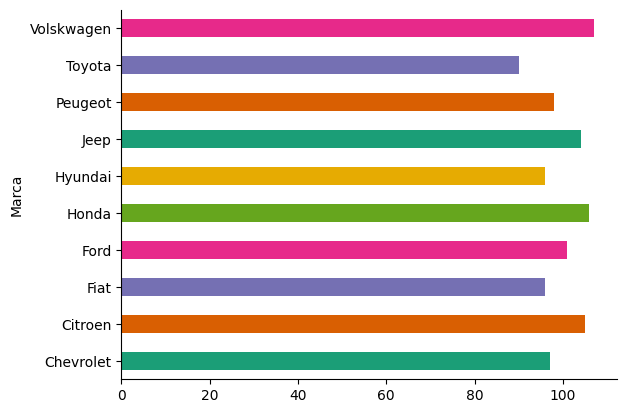

In [13]:
# @title Divisão por Marca

from matplotlib import pyplot as plt
import seaborn as sns
df_vendas.groupby('Marca').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

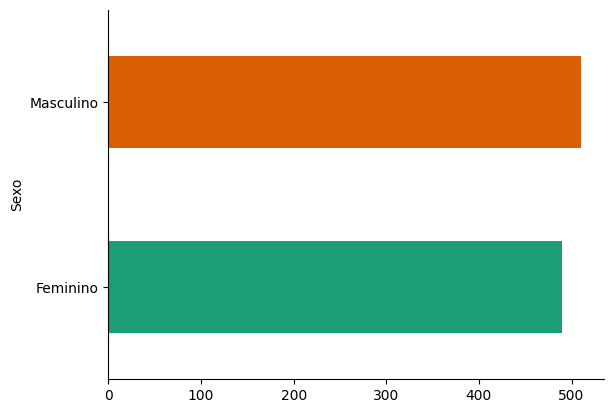

In [14]:
# @title Divisão por Sexo

from matplotlib import pyplot as plt
import seaborn as sns
df_vendas.groupby('Sexo').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)